In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
df.isnull().sum()

,0
uniqueID,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


<Axes: >

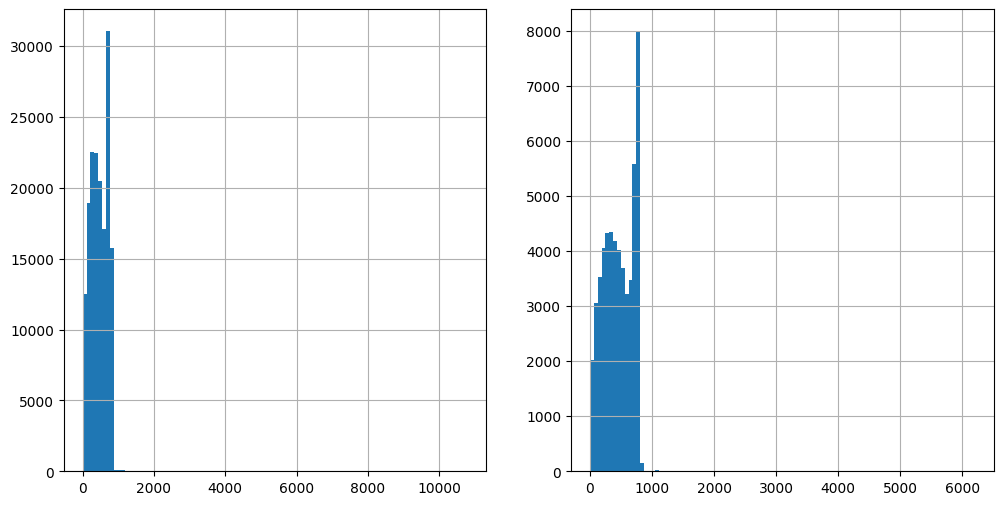

In [ ]:
import matplotlib.pyplot as plt
def remove_line_break(text):
    # Removes all line breaks
    for sign in '\r\n':
        text = text.replace(sign, " ")
    return text

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df["review"]=df["review"].apply(remove_line_break)
df['lenght'] = df['review'].apply(lambda x: len(x))
df['lenght'].hist(bins=100)
plt.subplot(1,2,2)
test["review"] = test["review"].apply(remove_line_break)
test['lenght'] = test['review'].apply(lambda x: len(x))
test['lenght'].hist(bins=100)

In [ ]:
len(df['condition'].unique())

885

<Axes: xlabel='condition'>

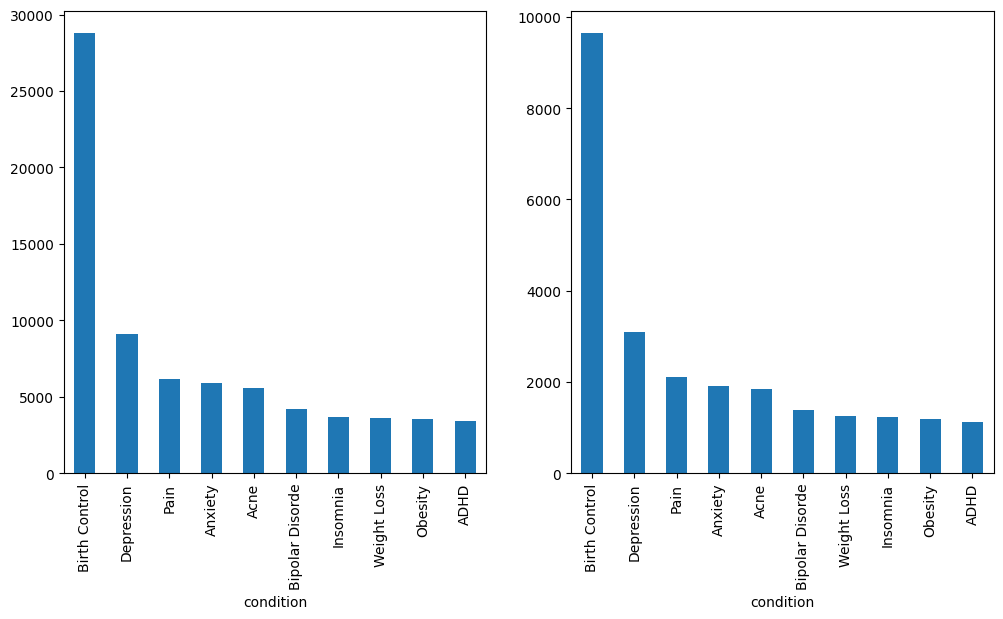

In [ ]:
plt.figure(figsize=(12, 6))
df.dropna(inplace = True)
plt.subplot(1,2,1)
df['condition'].value_counts().head(10).plot.bar()
plt.subplot(1,2,2)
test['condition'].value_counts().head(10).plot.bar()

In [ ]:
print(df.iloc[df['usefulCount'].argsort()[::-1].head(100)].groupby('condition')['rating'].mean())

condition
Anxiety                       9.923077
Anxiety and Stress            8.444444
Birth Control                 8.888889
Depression                    9.405405
Muscle Spasm                 10.000000
Obesity                      10.000000
Opiate Withdrawal             9.000000
Osteoporosis                  6.000000
Pain                          9.777778
Panic Disorde                10.000000
Polycystic Ovary Syndrome    10.000000
Urinary Tract Infection      10.000000
Weight Loss                   9.600000
emale Infertility            10.000000
Name: rating, dtype: float64


In [ ]:
print(test.iloc[test['usefulCount'].argsort()[::-1].head(100)].groupby('condition')['rating'].mean())

condition
ADHD                                10.000000
Anxiety                              9.428571
Anxiety and Stress                   9.600000
Birth Control                        8.166667
Breast Cance                         2.000000
Depression                           9.184211
Erectile Dysfunction                 9.000000
Generalized Anxiety Disorde          9.000000
Hashimoto's disease                 10.000000
High Blood Pressure                  6.000000
High Cholesterol                     5.000000
Obesity                             10.000000
Obsessive Compulsive Disorde        10.000000
Opiate Withdrawal                   10.000000
Ovulation Induction                 10.000000
Pain                                 9.000000
Panic Disorde                       10.000000
Sexual Dysfunction, SSRI Induced     8.000000
Underactive Thyroid                 10.000000
Urinary Tract Infection             10.000000
Weight Loss                         10.000000
Name: rating, dtype: flo

In [ ]:
df.drop(columns = ['uniqueID', 'date'],
        inplace = True)
test.drop(columns = ['uniqueID', 'date'],
        inplace = True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
vectorizer = TfidfVectorizer()
scaler = MinMaxScaler()
linear = LinearRegression()
coltran = ColumnTransformer(transformers = [('oe', oe, ['drugName', 'condition']),
                                            ('vectorizer', vectorizer, 'review'),
                                            ('mms', scaler, ['usefulCount'])],
                            remainder = 'passthrough')
pipe = Pipeline(steps = [('coltran', coltran),
                         ('linear', linear)])
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'rating'),
                                                    df['rating'],
                                                    test_size = 0.3,
                                                    stratify = df['rating'])
pipe.fit(X_train, y_train)
pred_pipe = pipe.predict(X_test)
print(r2_score(y_test, pred_pipe))

0.4849317113725874


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Trasformatori
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
vectorizer = TfidfVectorizer()
scaler = MinMaxScaler()
svc = LinearSVC(max_iter=10000)

# ColumnTransformer per le feature
coltran = ColumnTransformer(transformers=[
    ('oe', oe, ['drugName']),          # Encoding per colonne categoriche
    ('vectorizer', vectorizer, 'review'),  # Trasformazione testo
    ('mms', scaler, ['usefulCount'])   # Scaler per colonne numeriche
], remainder='drop')

# Pipeline finale
pipe = Pipeline(steps=[
    ('coltran', coltran),
    ('svc', svc)
])

# Divisione Dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='condition'),  # Features
    df['condition'],               # Target categorico
    test_size=0.3,
    random_state=42
)

# Addestramento della Pipeline
pipe.fit(X_train, y_train)

# Predizione
pred_pipe = pipe.predict(X_test)

# Valutazione del Modello
print("Accuracy Score:", accuracy_score(y_test, pred_pipe))
print("\nClassification Report:\n", classification_report(y_test, pred_pipe))

In [ ]:
y_train